In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [3]:
vehicles = pd.read_csv('/content/gdrive/MyDrive/DM PART C ASSIGNMENT/vehicles.csv')

In [4]:
vehicles.head(10)

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,1G1YU3DW1A5106980,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,5NPEC4AB0EH813529,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,NaN,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,NaN,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600
5,5,7239776805,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,29590,2016.0,toyota,tacoma double cab sr5,good,6 cylinders,gas,33290.0,clean,other,3TMAZ5CN6GM020355,NaN,NaN,pickup,red,https://images.craigslist.org/00k0k_9nUNSlCBLM...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-01T07:27:25-0600
6,6,7239425036,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,39990,2012.0,ford,mustang shelby gt500 coupe,good,8 cylinders,gas,9692.0,clean,other,1ZVBP8JS8C5240016,rwd,NaN,coupe,blue,https://images.craigslist.org/01515_fL9MWURsaZ...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-11-30T13:34:00-0600
7,7,7238667661,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,41990,2012.0,chevrolet,camaro zl1 coupe 2d,good,8 cylinders,gas,2778.0,clean,other,2G1FS1EP4C9800609,rwd,NaN,coupe,red,https://images.craigslist.org/00p0p_eXZbgunMDy...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-11-29T07:39:33-0600
8,8,7238127696,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,31990,2017.0,jeep,wrangler unlimited sport s,good,6 cylinders,gas,29614.0,clean,other,1C4BJWDG9HL725235,4wd,NaN,other,NaN,https://images.craigslist.org/00g0g_lCDDDlgwtZ...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-11-28T07:21:09-0600
9,9,7237779886,https://auburn.craigslist.org/ctd/d/santa-cruz...,auburn,https://auburn.craigslist.org,490,2019.0,ford,transit connect wagon xlt,excellent,4 cylinders,gas,4775.0,clean,automatic,NM0GE9F22K1398142,NaN,NaN,van,NaN,https://images.craigslist.org/00D0D_foGOQzDTOx...,2019 Ford Transit Connect Wagon XLT FOR ONLY $...,al,36.967357,-122.024254,2020-11-27T12:42:28-0600


In [5]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    458213 non-null  int64  
 1   id            458213 non-null  int64  
 2   url           458213 non-null  object 
 3   region        458213 non-null  object 
 4   region_url    458213 non-null  object 
 5   price         458213 non-null  int64  
 6   year          457163 non-null  float64
 7   manufacturer  439993 non-null  object 
 8   model         453367 non-null  object 
 9   condition     265273 non-null  object 
 10  cylinders     287073 non-null  object 
 11  fuel          454976 non-null  object 
 12  odometer      402910 non-null  float64
 13  title_status  455636 non-null  object 
 14  transmission  455771 non-null  object 
 15  VIN           270664 non-null  object 
 16  drive         324025 non-null  object 
 17  size          136865 non-null  object 
 18  type

In [6]:
vehicles.describe()

,Unnamed: 0,id,price,year,odometer,lat,long
count,458213.000000,4.582130e+05,4.582130e+05,457163.000000,4.029100e+05,450765.000000,450765.000000
mean,229106.000000,7.235233e+09,4.042093e+04,2010.746067,1.016698e+05,38.531925,-94.375824
std,132274.843786,4.594362e+06,8.194599e+06,8.868136,3.228623e+06,5.857378,18.076225
min,0.000000,7.208550e+09,0.000000e+00,1900.000000,0.000000e+00,-82.607549,-164.091797
25%,114553.000000,7.231953e+09,4.900000e+03,2008.000000,4.087700e+04,34.600000,-110.890427
50%,229106.000000,7.236409e+09,1.099500e+04,2013.000000,8.764100e+04,39.244500,-88.314889
75%,343659.000000,7.239321e+09,2.149500e+04,2016.000000,1.340000e+05,42.484503,-81.015022
max,458212.000000,7.241019e+09,3.615215e+09,2021.000000,2.043756e+09,82.049255,150.898969


# DATA PREPROCESSING

In [7]:
vehicles.isnull().sum()

Unnamed: 0           0
id                   0
url                  0
region               0
region_url           0
price                0
year              1050
manufacturer     18220
model             4846
condition       192940
cylinders       171140
fuel              3237
odometer         55303
title_status      2577
transmission      2442
VIN             187549
drive           134188
size            321348
type            112738
paint_color     140843
image_url           28
description         70
state                0
lat               7448
long              7448
posting_date        28
dtype: int64

In [8]:
# dropping unwanted attributes
vehicles.drop(['Unnamed: 0', 'id', 'url','region_url', 'VIN', 'image_url', 'lat', 'long', 'description'], axis=1, inplace=True)

In [9]:
# dropping "size" attribute since it contains majority null values
vehicles.drop(['size'], axis=1, inplace=True)

In [10]:
# filling missing values in "drive" with the most frequent value
vehicles["drive"].fillna(vehicles["drive"].mode()[0], inplace=True)

In [11]:
# filling missing values in "cylinders" with the most frequent value
vehicles["cylinders"].fillna(vehicles["cylinders"].mode()[0], inplace=True)

In [12]:
# dropping records with "price" < 10000
vehicles.drop(vehicles[vehicles['price'] < 10000].index, inplace = True) 

In [13]:
# dropping records with "odometer" > 1000000
vehicles.drop(vehicles[vehicles['odometer'] > 1000000].index, inplace = True) 

In [14]:
# dropping any remaining null values
vehicles.dropna(inplace=True)

### Dropping rows where posting date < manufacture year

In [15]:
# creating a temporary column to hold posting_year 
vehicles['posting_year']  = vehicles['posting_date'].str.slice(0, 4)
vehicles['posting_year'] = vehicles['posting_year'].astype(int)  # converts column values to integer

In [16]:
# dropping rows where posting year < manufacture year
vehicles.drop(vehicles[vehicles['posting_year'] < vehicles['year']].index, inplace = True)
vehicles.drop(['posting_year'], axis = 1, inplace = True) # dropping the posting_year column

In [17]:
vehicles.head(5)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,posting_date
4,auburn,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,pickup,blue,al,2020-12-01T12:53:56-0600
5,auburn,29590,2016.0,toyota,tacoma double cab sr5,good,6 cylinders,gas,33290.0,clean,other,4wd,pickup,red,al,2020-12-01T07:27:25-0600
6,auburn,39990,2012.0,ford,mustang shelby gt500 coupe,good,8 cylinders,gas,9692.0,clean,other,rwd,coupe,blue,al,2020-11-30T13:34:00-0600
7,auburn,41990,2012.0,chevrolet,camaro zl1 coupe 2d,good,8 cylinders,gas,2778.0,clean,other,rwd,coupe,red,al,2020-11-29T07:39:33-0600
10,auburn,27500,2012.0,ford,f-250,excellent,6 cylinders,diesel,189000.0,clean,automatic,4wd,pickup,silver,al,2020-11-27T12:12:30-0600


In [18]:
# since the index of the rows after dropping records 
# is not in the right order 
# it is resetted 
vehicles.reset_index(drop=True, inplace = True)
vehicles.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,posting_date
0,auburn,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,pickup,blue,al,2020-12-01T12:53:56-0600
1,auburn,29590,2016.0,toyota,tacoma double cab sr5,good,6 cylinders,gas,33290.0,clean,other,4wd,pickup,red,al,2020-12-01T07:27:25-0600
2,auburn,39990,2012.0,ford,mustang shelby gt500 coupe,good,8 cylinders,gas,9692.0,clean,other,rwd,coupe,blue,al,2020-11-30T13:34:00-0600
3,auburn,41990,2012.0,chevrolet,camaro zl1 coupe 2d,good,8 cylinders,gas,2778.0,clean,other,rwd,coupe,red,al,2020-11-29T07:39:33-0600
4,auburn,27500,2012.0,ford,f-250,excellent,6 cylinders,diesel,189000.0,clean,automatic,4wd,pickup,silver,al,2020-11-27T12:12:30-0600


# Model Interpretations
### Max price of car sold per year

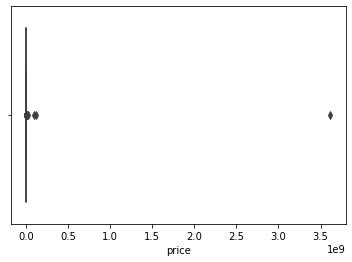

In [19]:
# identify outliers
sns.boxplot(x=vehicles['price'])

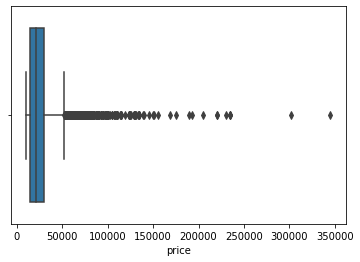

In [20]:
# dropping records with "price" > 500000
vehicles.drop(vehicles[vehicles['price'] > 500000].index, inplace = True) 
sns.boxplot(x=vehicles['price'])

In [21]:
# to idenitfy the maximum price of car sold in a particular year
max_price_per_year = vehicles.groupby('year')['price'].max()
print(max_price_per_year)

year
1923.0     16500
1927.0     25000
1928.0     54999
1929.0     75000
1930.0     32500
           ...  
2016.0    345000
2017.0    192500
2018.0    235000
2019.0    154900
2020.0    135000
Name: price, Length: 90, dtype: int64


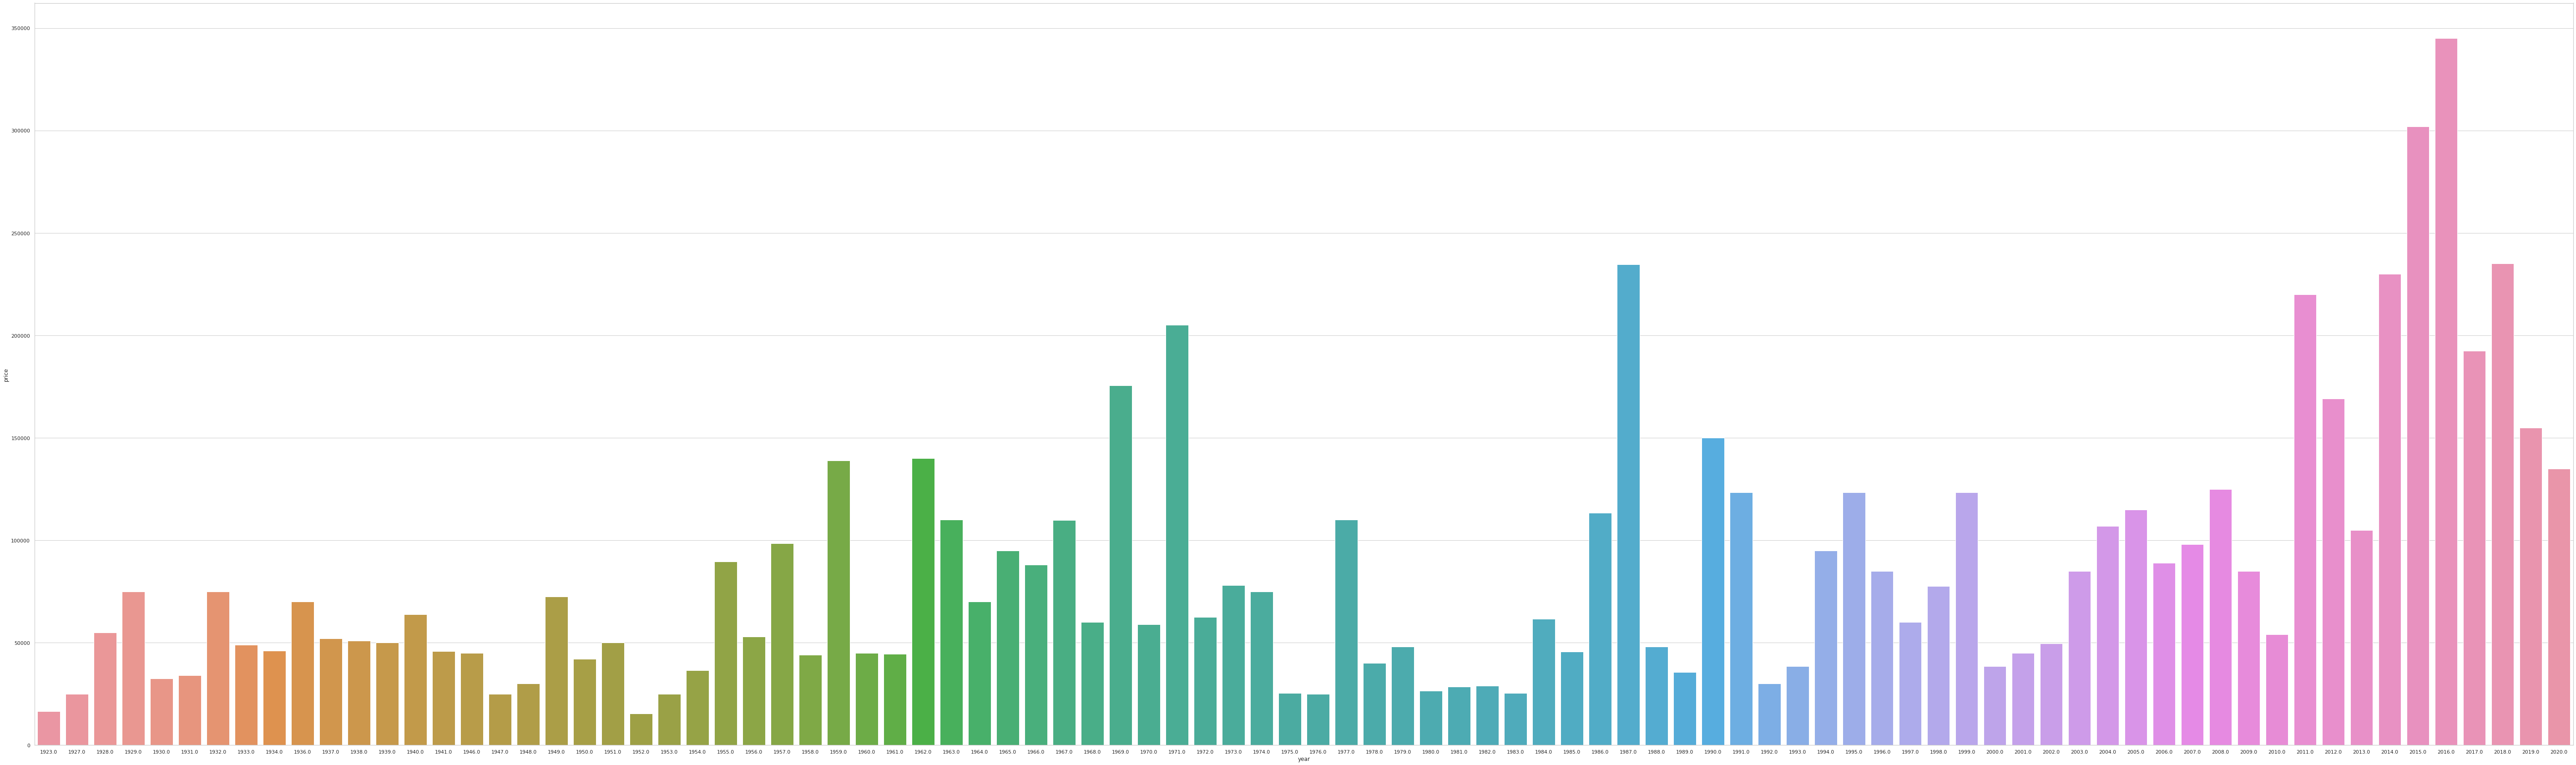

In [22]:
year = []
price = []
for key, value in max_price_per_year.items():
  if key < 2021:
    year.append(key)
    price.append(value)

# creating the bar plot 
sns.set(rc={'figure.figsize':(100,30)})
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=year, y=price)
ax.set(xlabel='year', ylabel='price')
plt.show()

### Most frequent manufacturer that was listed in the craiglist post

In [23]:
count_by_manufacturer = vehicles['manufacturer'].value_counts()

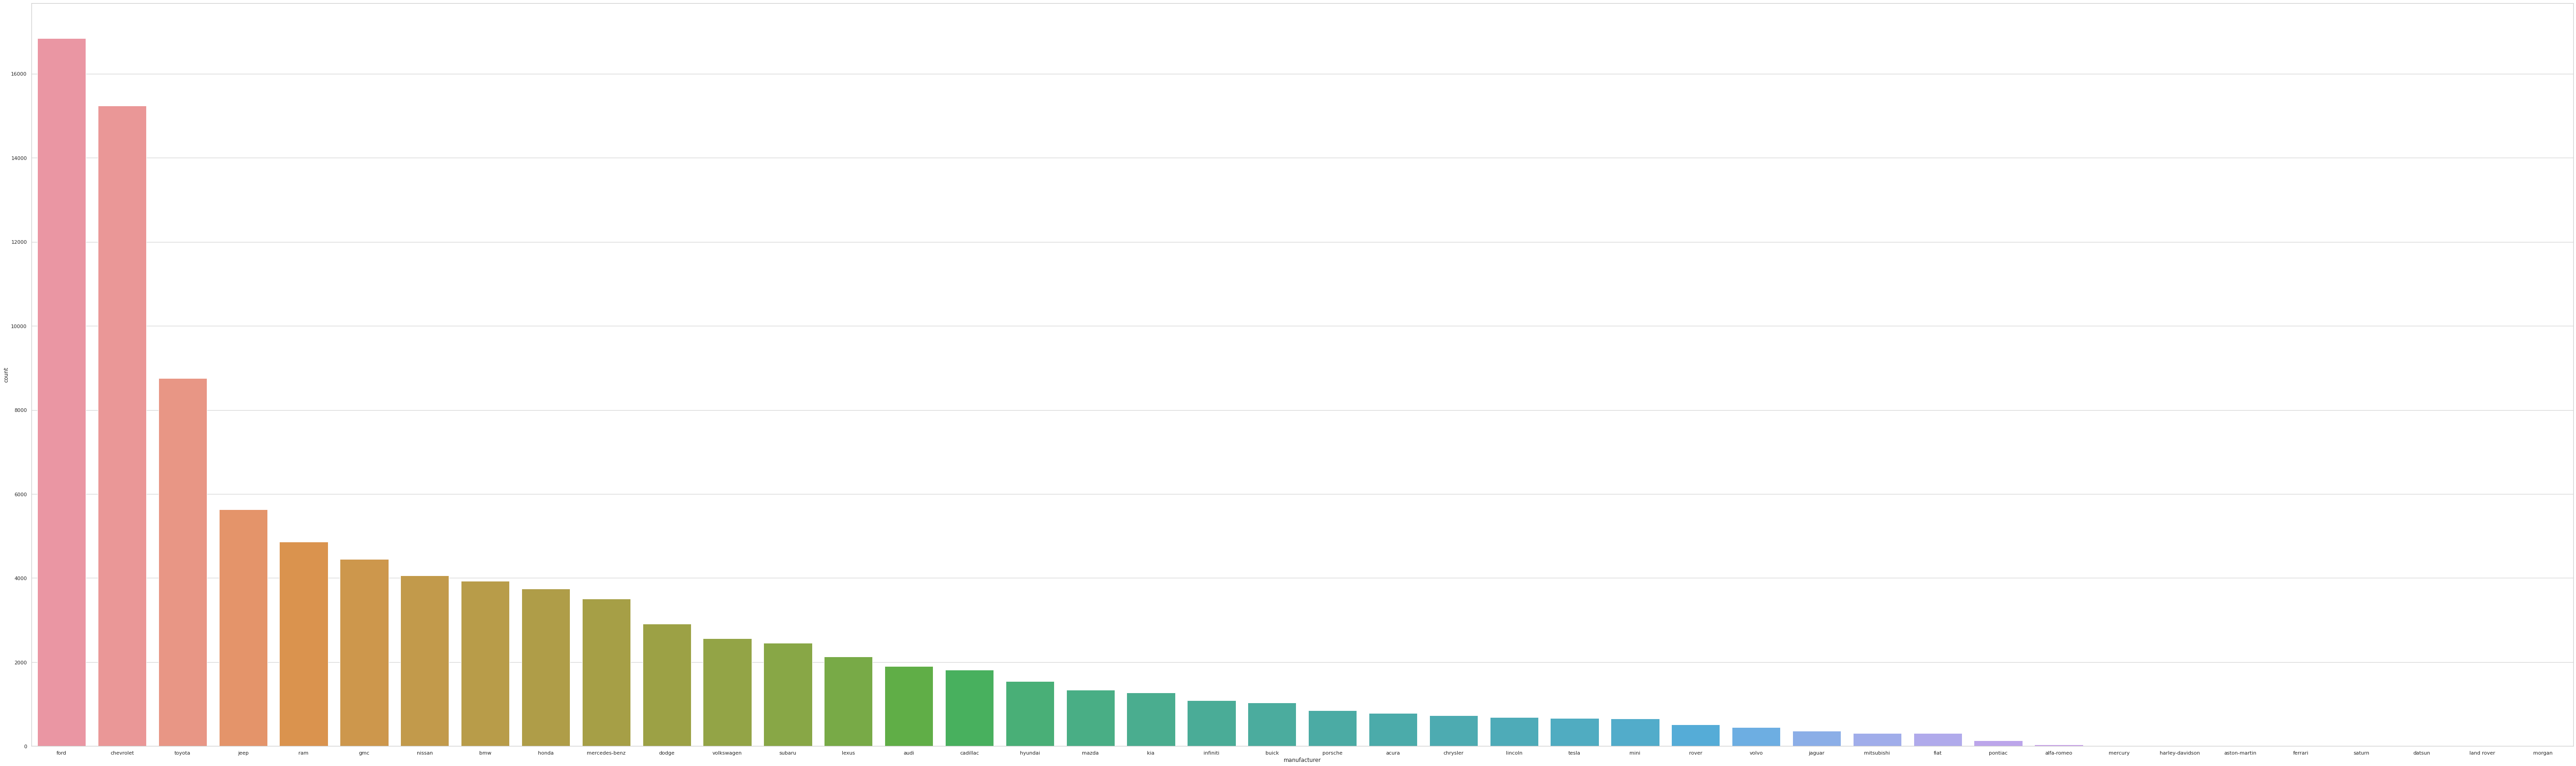

In [24]:
manufacturer = []
count = []
for key, value in count_by_manufacturer.items():
    manufacturer.append(key)
    count.append(value)
    
# creating the bar plot 
sns.set(rc={'figure.figsize':(100,30)})
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=manufacturer, y=count)
ax.set(xlabel='manufacturer', ylabel='count')
plt.show()

# Classification
### Predicting condition of a car using logisitc regression, naive bayes and KNN classifier

In [25]:
# Label encoding is a way of converting each value in a column to a number.
# In order to prepare data for predictive modeling we will use Label Encoder since we have many categories for categorical variables. 
le = preprocessing.LabelEncoder()
vehicles[['region','manufacturer','model', 'condition', 'cylinders','fuel','title_status','transmission','drive'
             ,'type','paint_color','state']] = vehicles[['region','manufacturer','model', 'condition', 'cylinders','fuel','title_status',
                                                            'transmission','drive','type','paint_color','state']].apply(le.fit_transform)

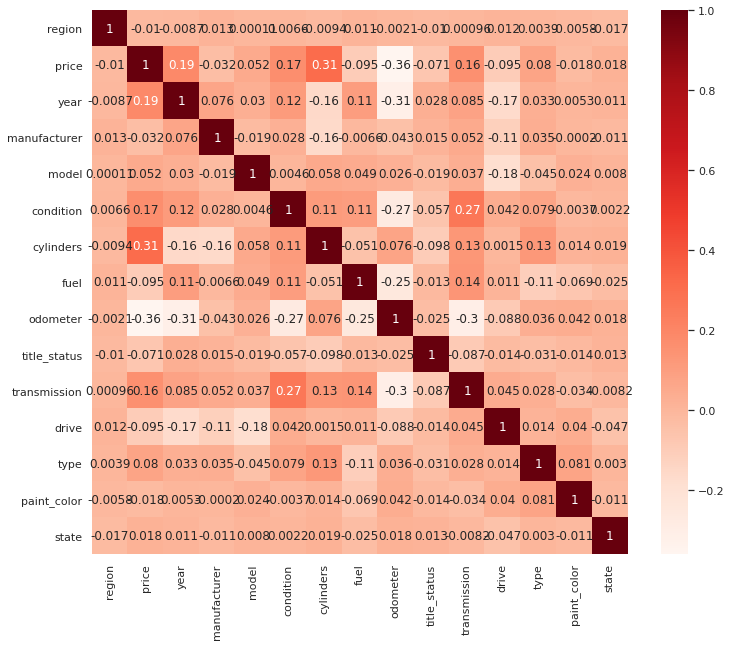

In [26]:
# Plotting correlation matrix
plt.figure(figsize=(12,10))
cor = vehicles.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [27]:
# the attributes "year, transmission, cylinders, fuel and odometer" 
# were found to be highly correlated with condition
# hence are considered for predicting condition
features_p = vehicles[["year", "transmission", "cylinders", "fuel", "odometer"]]
target_p = vehicles["condition"]

# splitting our dataset randomly with the test data containing 25% of the data,
x_train, x_test, y_train, y_test = train_test_split(features_p,target_p, 
                                                    test_size=0.25, 
                                                    random_state=1)


In [28]:
# naive bayes
from sklearn.naive_bayes import GaussianNB

classifierNB = GaussianNB()
classifierNB.fit(x_train, y_train)  
naive_baye_predicted = classifierNB.predict(x_test)
classifierNB.score(x_test, y_test)

0.5922799541058843

In [29]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

n = len(vehicles)
classifierKNN = KNeighborsClassifier(n_neighbors=int(np.sqrt(n)))  # optimal value of k = sqrt(n) is considered
classifierKNN.fit(x_train, y_train)
knn_predicted = classifierKNN.predict(x_test)
classifierKNN.score(x_test, y_test)

0.6181773479757416

In [30]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

classifierLR = LogisticRegression(solver='liblinear')
classifierLR.fit(x_train, y_train)
LR_predicted = classifierLR.predict(x_test)
classifierLR.score(x_test, y_test)

0.6573102770037699

In [31]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train, y_train)
rf_classifier_predicted = rf_classifier.predict(x_test)
rf_classifier.score(x_test, y_test)

0.787370922799541

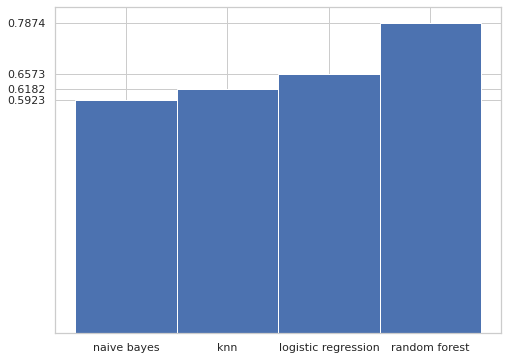

In [86]:
# plotting accuracies of each model for comparision
top=[('naive bayes',0.5922799541058843),('knn',0.6181773479757416),('logistic regression',0.6573102770037699),('random forest',0.787370922799541)]

labels, ys = zip(*top)
xs = np.arange(len(labels)) 
width = 1

plt.figure(figsize=(8,6))
plt.bar(xs, ys, width, align='center')
plt.xticks(xs, labels)
plt.yticks(ys)
plt.show()

### Predicting selling price of a car using linear regression, decision trees and random forest

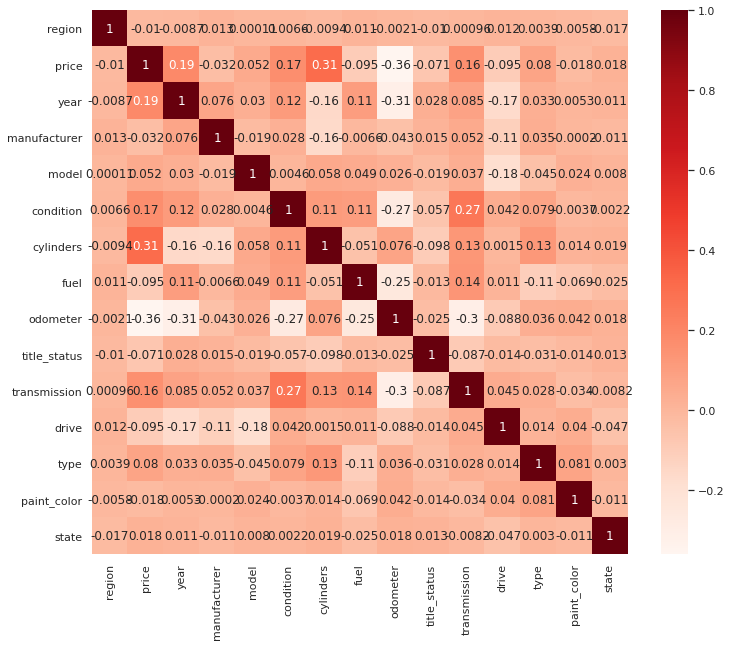

In [32]:
# Plotting correlation matrix
plt.figure(figsize=(12,10))
cor = vehicles.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [33]:
# the attributes "drive, odometer cylinders, fuel and year" 
# were found to be highly correlated with price
# hence are considered for predicting price
features_p = vehicles[["drive","odometer","cylinders","fuel","year"]]
target_p = vehicles[["price"]]

In [34]:
# splitting our dataset randomly with the test data containing 25% of the data,
x_train, x_test, y_train, y_test = train_test_split(features_p,target_p, 
                                                    test_size=0.25, 
                                                    random_state=0)

In [35]:
# run the regression model with Pearson Correlation method
reg_model_p = LinearRegression()
reg_model_p.fit(x_train, y_train)
lr_pred_p = reg_model_p.predict(x_test)
reg_model_p.score(x_test, y_test)

0.3199159517944089

In [36]:
# decision trees
dtree_m = DecisionTreeRegressor(criterion='mae',max_depth = 14)
model = dtree_m.fit(x_train, y_train)  
pred = dtree_m.predict(x_test)
dtree_m.score(x_test, y_test)

0.6126212393541901

In [37]:
# random forest
rf = RandomForestRegressor(random_state=1)
model = rf.fit(x_train, y_train.values.ravel())
rf_pred = rf.predict(x_test)
rf.score(x_test, y_test)

0.6785984759067346

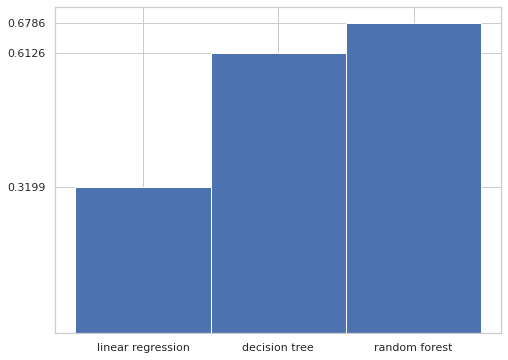

In [87]:
# plotting accuracies of each model for comparision
top=[('linear regression',0.3199159517944089),('decision tree',0.6126212393541901),('random forest',0.6785984759067346)]

labels, ys = zip(*top)
xs = np.arange(len(labels)) 
width = 1

plt.figure(figsize=(8,6))
plt.bar(xs, ys, width, align='center')
plt.xticks(xs, labels)
plt.yticks(ys)
plt.show()

# Clustering

In [77]:
# splitting our dataset randomly with the test data containing 25% of the data,
x_train, x_test, y_train, y_test = train_test_split(features_p,target_p, 
                                                    test_size=0.25, 
                                                    random_state=1)
from sklearn.decomposition import PCA
pca = PCA(2)
 
#Transform the data
train_scaled = pca.fit_transform(x_train)

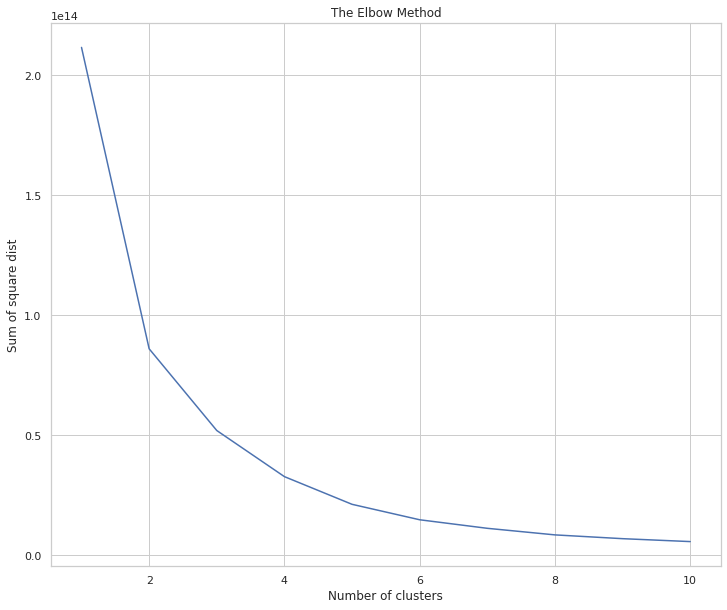

In [80]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# features_p = x_train[["year", "cylinders", "fuel", "odometer"]]
# features_test = x_test[["year", "cylinders", "fuel", "odometer"]]
# using elbow method to find optimal K value
sum_of_square_dist = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(x_train)
    sum_of_square_dist.append(kmeans.inertia_)

plt.figure(figsize=(12,10))
plt.plot(range(1,11),sum_of_square_dist)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of square dist')
plt.show()

In [73]:
# Applying k-means
# optimal K value was found to be 2
kmeans = KMeans(n_clusters=2,init='k-means++') 
# predict the labels of clusters.
label = kmeans.fit_predict(train_scaled)
 
print(label)
silhouette_score(train_scaled, kmeans.labels_, metric='euclidean')


[0 1 1 ... 0 1 1]


0.6185422298274467

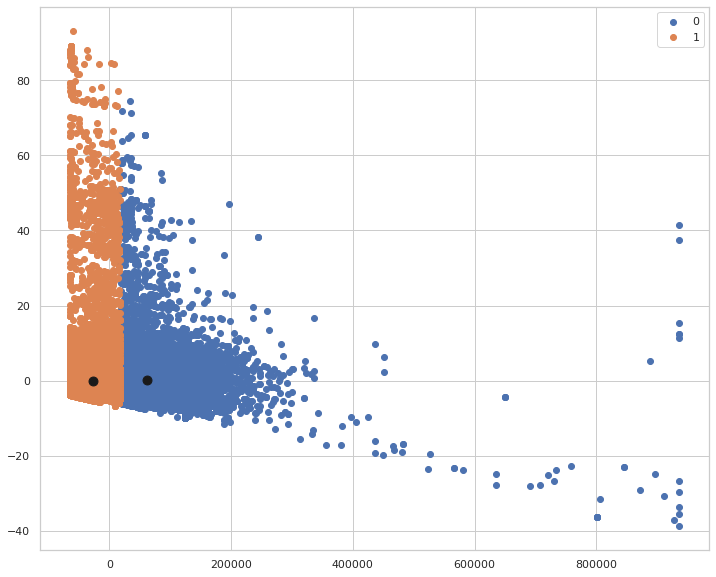

In [74]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
plt.figure(figsize=(12,10))
for i in u_labels:
    plt.scatter(train_scaled[label == i , 0] , train_scaled[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()